## Descrição

Baixando e formatadando dados para o Tech Challenge do site:
    
- http://vitibrasil.cnpuv.embrapa.br/index.php?opcao=opt_01

## Importando bibliotecas

In [1946]:
import os
import pandas as pd

## Funções usadas

In [1947]:
def formata_df(df: pd.DataFrame, tipo: str) -> pd.DataFrame:

    """Função usada para formatar o dado
    """

    #PEGA COLUNAS QUANTIDADE
    colunas_qtd = [i for i in df.columns if '.' not in i]
    colunas_qtd.remove('Id')

    #PEGA COLUNAS VALOR
    colunas_valor = [i for i in df.columns if '.' in i]
    colunas_valor.insert(0, 'País')

    #DF QUANTIDADE
    df_qtd = df[colunas_qtd]
    df_qtd_melted = df_qtd.melt(id_vars=['País'], value_vars=df_qtd.columns)
    df_qtd_melted.columns = ['pais_destino', 'ano', 'quantidade']

    #DF VALOR
    df_valor = df[colunas_valor]
    df_valor.columns = colunas_qtd #RENOMEANDO COLUNAS PARA FACILITAR O MATCH DEPOIS

    df_valor_melted = df_valor.melt(id_vars=['País'], value_vars=df_valor.columns)
    df_valor_melted.columns = ['pais_destino', 'ano', 'valor']

    #JUNTANDO AS INFORMAÇÕES
    df_merged = pd.merge(df_qtd_melted,
                         df_valor_melted,
                         left_on=['pais_destino', 'ano'],
                         right_on=['pais_destino', 'ano'])

    #CRIANDO COLUNAS
    df_merged['pais_origem'] = 'Brasil'
    df_merged['tipo'] = tipo

    return df_merged[['ano', 'pais_origem', 'pais_destino', 'tipo', 'quantidade', 'valor']]

***

Usado para criar colunas com os nomes corretos (anos e tipo do vinho)

In [1948]:
nome_colunas = [i for i in range(1970, 2022)]
nome_colunas.insert(0, 'VINHO')

**negrito**## Formatação

### 1. Produção

In [1949]:
producao_linhas_para_remover = ['VINHO DE MESA', 'VINHO FINO DE MESA (VINÍFERA)', 'SUCO', 'DERIVADOS']

In [1950]:
df_producao = pd.read_csv('/content/drive/MyDrive/dados/raw/producao/Producao.csv', delimiter=';',
                         header=None)

df_producao = df_producao[df_producao.columns[2:]]
df_producao.columns = nome_colunas
df_producao = df_producao.query('VINHO not in @producao_linhas_para_remover').reset_index()

df_producao.loc[df_producao.index[0:3], 'TIPO'] = 'VINHO DE MESA'
df_producao.loc[df_producao.index[3:6], 'TIPO'] = 'VINHO FINO DE MESA (VINÍFERA)'
df_producao.loc[df_producao.index[6:11], 'TIPO'] = 'SUCO'
df_producao.loc[df_producao.index[11:], 'TIPO'] = 'DERIVADOS'
df_producao.head()

,index,VINHO,1970,1971,1972,1973,1974,1975,1976,1977,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,TIPO
0,1,Tinto,174224052,121133369,118180926,88589019,146544484,144274134,118360170,154801826,...,163111797,157776363,169811472,75279191,1365957,188270142,121045115,103916391,146075996,VINHO DE MESA
1,2,Branco,748400,1160500,1812367,243900,4138768,1441507,1871473,4954387,...,32066403,37438069,39557250,10727099,217527985,29229970,22032828,19568734,26432799,VINHO DE MESA
2,3,Rosado,42236152,31970782,26960004,27877426,43192093,31685568,24333795,35603565,...,1726022,958691,939838,312725,36121245,875524,1551794,715289,1391200,VINHO DE MESA
3,5,Tinto,7591557,7265666,6782837,3419625,10047658,14731106,12405154,16131758,...,23156458,17208996,16745896,8774847,21442212,19118254,17389377,15451883,20433249,VINHO FINO DE MESA (VINÍFERA)
4,6,Branco,15562889,15655709,13289304,7930070,18927471,21933695,19874659,20409231,...,21906349,20054804,19561966,8705066,21928400,18297257,18193055,15487915,20867999,VINHO FINO DE MESA (VINÍFERA)


##### Escrevendo versão "formatada"

In [1951]:
df_producao.to_csv('//content/drive/MyDrive/dados/formatted/df_producao.csv', encoding='utf-8', sep='|', index=False)

***

### 2. Processamento

In [1952]:
processamento_linhas_para_remover = ['TINTAS', 'BRANCAS E ROSADAS', 'BRANCAS']

In [1953]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Viniferas

In [1954]:
df_processamento_viniferas = pd.read_csv('/content/drive/MyDrive/dados/raw/processamento/ProcessaViniferas.csv',
                              delimiter='\t')

df_processamento_viniferas = df_processamento_viniferas[df_processamento_viniferas.columns[2:]]
df_processamento_viniferas = df_processamento_viniferas.query('cultivar not in @processamento_linhas_para_remover').reset_index()

df_processamento_viniferas.loc[df_processamento_viniferas.index[0:68], 'TIPO'] = 'TINTAS'
df_processamento_viniferas.loc[df_processamento_viniferas.index[68:], 'TIPO'] = 'BRANCAS E ROSADAS'

df_processamento_viniferas = df_processamento_viniferas.rename(columns={'cultivar': 'VINHO'})

df_processamento_viniferas.head()

,index,VINHO,1970,1971,1972,1973,1974,1975,1976,1977,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,TIPO
0,1,Alicante Bouschet,0,0,0,0,0,0,0,0,...,1524728,1456305,1519576,908841,2040198,2103844,nd,2272985,811140,TINTAS
1,2,Ancelota,0,0,0,0,0,0,0,0,...,1137943,937844,773526,179028,733907,492106,nd,481402,6513974,TINTAS
2,3,Aramon,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,nd,0,0,TINTAS
3,4,Alfrocheiro,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,nd,0,0,TINTAS
4,5,Arinarnoa,0,0,0,0,0,0,0,0,...,65001,56666,61817,17691,69757,44775,nd,90860,2785609,TINTAS


#### Americanas e hibridas

In [1955]:
df_processamento_americanas = pd.read_csv('/content/drive/MyDrive/dados/raw/processamento/ProcessaAmericanas.csv',
                              delimiter=';')

df_processamento_americanas = df_processamento_americanas[df_processamento_americanas.columns[2:]]
df_processamento_americanas = df_processamento_americanas.query('cultivar not in @processamento_linhas_para_remover').reset_index()

df_processamento_americanas.loc[df_processamento_americanas.index[0:34], 'TIPO'] = 'TINTAS'
df_processamento_americanas.loc[df_processamento_americanas.index[34:], 'TIPO'] = 'BRANCAS E ROSADAS'

df_processamento_americanas = df_processamento_americanas.rename(columns={'cultivar': 'VINHO'})

df_processamento_americanas.head()

,index,VINHO,1970,1971,1972,1973,1974,1975,1976,1977,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,TIPO
0,1,Bacarina,82899,106962,67464,58690,138158,101454,57297,0,...,2990,3900,0,0,0,0,nd,0,0,TINTAS
1,2,Bailey,0,0,0,0,0,0,0,0,...,756000,991449,963159,442784,1370092,539742,nd,534981,4092669,TINTAS
2,3,Bordo,7242197,7227090,6530686,5584243,13341412,16023998,12725233,18714617,...,102788361,113008320,137467196,60976531,160146475,158405972,nd,129978861,117655879,TINTAS
3,4,Bourdin (S),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,nd,0,0,TINTAS
4,5,BRS Carmen,0,0,0,0,0,0,0,0,...,605728,1553111,2891792,2964574,6771269,7472984,nd,11540681,13771662,TINTAS


#### Uvas de mesa

In [1956]:
df_processamento_uvas_de_mesa = pd.read_csv('/content/drive/MyDrive/dados/raw/processamento/ProcessaMesa.csv',
                              delimiter=';')

df_processamento_uvas_de_mesa = df_processamento_uvas_de_mesa[df_processamento_uvas_de_mesa.columns[2:]]
df_processamento_uvas_de_mesa = df_processamento_uvas_de_mesa.query('cultivar not in @processamento_linhas_para_remover').reset_index()

df_processamento_uvas_de_mesa.loc[df_processamento_uvas_de_mesa.index[0:2], 'TIPO'] = 'TINTAS'
df_processamento_uvas_de_mesa.loc[df_processamento_uvas_de_mesa.index[2:], 'TIPO'] = 'BRANCAS'

df_processamento_uvas_de_mesa = df_processamento_uvas_de_mesa.rename(columns={'cultivar': 'VINHO'})

df_processamento_uvas_de_mesa.head()

,index,VINHO,1970,1971,1972,1973,1974,1975,1976,1977,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,TIPO
0,1,Alphonse Lavallee,31878,2333,170,7690,124762,74293,23684,24430,...,0,0,0,0,0,0,nd,0,0,TINTAS
1,2,Moscato de Hamburgo,25098,41057,4258,1249,801,109438,64828,89161,...,75362,65850,108797,51310,85510,62567,nd,63474,21732,TINTAS
2,4,Cardinal,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,nd,0,0,BRANCAS
3,5,Golden Queen,167,8654,657,7312,8467,6805,0,2391,...,0,0,0,0,0,0,nd,0,0,BRANCAS
4,6,Patrícia,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,nd,0,0,BRANCAS


#### Concatenando todos os DFs


In [1957]:
df_processamento = pd.concat([df_processamento_viniferas,
                              df_processamento_americanas,
                              df_processamento_uvas_de_mesa])
df_processamento.head()

,index,VINHO,1970,1971,1972,1973,1974,1975,1976,1977,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,TIPO
0,1,Alicante Bouschet,0,0,0,0,0,0,0,0,...,1524728,1456305,1519576,908841,2040198,2103844,nd,2272985,811140,TINTAS
1,2,Ancelota,0,0,0,0,0,0,0,0,...,1137943,937844,773526,179028,733907,492106,nd,481402,6513974,TINTAS
2,3,Aramon,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,nd,0,0,TINTAS
3,4,Alfrocheiro,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,nd,0,0,TINTAS
4,5,Arinarnoa,0,0,0,0,0,0,0,0,...,65001,56666,61817,17691,69757,44775,nd,90860,2785609,TINTAS


##### Escrevendo versão "formatada"

In [1958]:
df_processamento.to_csv('/content/drive/MyDrive/dados/formatted/df_processamento.csv', encoding='utf-8', sep='|', index=False)

***

### 3. Comercialização

In [1959]:
comercializacao_linhas_para_remover = ['VINHO DE MESA', 'VINHO  FINO DE MESA', 'VINHO ESPECIAL', 'ESPUMANTES ', 'SUCO DE UVAS', 'OUTROS PRODUTOS COMERCIALIZADOS']

In [1960]:
df_comercializacao = pd.read_csv('/content/drive/MyDrive/dados/raw/comercializacao/Comercio.csv',
                                delimiter=';')

df_comercializacao = df_comercializacao[df_comercializacao.columns[2:]]
df_comercializacao.columns = nome_colunas
df_comercializacao = df_comercializacao.query('VINHO not in @comercializacao_linhas_para_remover').reset_index()

df_comercializacao.loc[df_comercializacao.index[0:3], 'TIPO'] = 'VINHO DE MESA'
df_comercializacao.loc[df_comercializacao.index[3:6], 'TIPO'] = 'VINHO FINO DE MESA'

#CASOS ESPECÍFICOS
df_comercializacao.loc[df_comercializacao.index[6], 'TIPO'] = 'VINHO FRIZANTE'
df_comercializacao.loc[df_comercializacao.index[7], 'TIPO'] = 'VINHO ORGÂNICO'
df_comercializacao.loc[df_comercializacao.index[8:11], 'TIPO'] = 'VINHO ESPECIAL'
df_comercializacao.loc[df_comercializacao.index[11:14], 'TIPO'] = 'ESPUMANTES'
df_comercializacao.loc[df_comercializacao.index[14:18], 'TIPO'] = 'SUCO DE UVAS'
df_comercializacao.loc[df_comercializacao.index[18], 'TIPO'] = 'SUCO DE UVAS CONCENTRADO'
df_comercializacao.loc[df_comercializacao.index[19:], 'TIPO'] = 'OUTROS PRODUTOS COMERCIALIZADOS'

df_comercializacao.head()

,index,VINHO,1970,1971,1972,1973,1974,1975,1976,1977,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,TIPO
0,0,Tinto,83300735,98522869,101167932,98196747,77167303,91528090,116407222,116609545,...,188033494,178250072,182028785,146646365,154309442,155115499,158519218,189573423,185653678,VINHO DE MESA
1,1,Rosado,107681,542274,7770851,8425617,8891367,7261777,11748047,15195525,...,1777648,1419855,1409002,1391942,1097426,1972944,1265435,1394901,1931606,VINHO DE MESA
2,2,Branco,14919190,15333888,9438584,9995546,8114654,9241925,11083345,9008044,...,31779668,26734500,25760681,18731315,20653091,20097830,20661836,24589607,22426954,VINHO DE MESA
3,4,Tinto,435354,428927,624499,783508,1616144,2050960,4450570,4504303,...,19121750,15354938,15572632,15228514,12021684,11150517,11433702,18202453,19337862,VINHO FINO DE MESA
4,5,Rosado,183234,227299,403664,1377333,1725564,2130619,3118919,3248565,...,214269,164219,169185,172351,182080,262430,503524,993248,1603537,VINHO FINO DE MESA


##### Escrevendo versão formatada

In [1961]:
df_comercializacao.to_csv('/content/drive/MyDrive/dados/formatted/df_comercializacao.csv', encoding='utf-8', sep='|', index=False)

***

### 4. Importação - PENDENTE
Manter coluna de valor? $

#### Vinhos de mesa

In [1962]:
df_importacao_vinhos_de_mesa = pd.read_csv('/content/drive/MyDrive/dados/raw/importacao/ImpVinhos.csv',
                           delimiter=';')

df_importacao_vinhos_de_mesa = formata_df(df_importacao_vinhos_de_mesa, 'Vinhos de mesa')
df_importacao_vinhos_de_mesa.tail()

,ano,pais_origem,pais_destino,tipo,quantidade,valor
3375,2021,Brasil,Ucrânia,Vinhos de mesa,0,0.0
3376,2021,Brasil,Uruguai,Vinhos de mesa,3788831,10063341.0
3377,2021,Brasil,Não consta na tabela,Vinhos de mesa,0,0.0
3378,2021,Brasil,Não declarados,Vinhos de mesa,0,0.0
3379,2021,Brasil,Outros,Vinhos de mesa,0,0.0


#### Espumantes


In [1963]:
df_importacao_espumantes = pd.read_csv('/content/drive/MyDrive/dados/raw/importacao/ImpEspumantes.csv',
                           delimiter=';')

df_importacao_espumantes = formata_df(df_importacao_espumantes, 'Espumantes')
df_importacao_espumantes.tail()

,ano,pais_origem,pais_destino,tipo,quantidade,valor
2179,2021,Brasil,Ucrânia,Espumantes,0,0
2180,2021,Brasil,Uruguai,Espumantes,8947,47217
2181,2021,Brasil,Não consta na tabela,Espumantes,0,0
2182,2021,Brasil,Não declarados,Espumantes,0,0
2183,2021,Brasil,Outros,Espumantes,0,0


#### Uvas frescas

In [1964]:
df_importacao_uvas_frescas = pd.read_csv('/content/drive/MyDrive/dados/raw/importacao/ImpFrescas.csv',
                           delimiter=';')

df_importacao_uvas_frescas = formata_df(df_importacao_uvas_frescas, 'Uvas frescas')
df_importacao_uvas_frescas[df_importacao_uvas_frescas['ano'] == '2021'].head()

,ano,pais_origem,pais_destino,tipo,quantidade,valor
969,2021,Brasil,Argélia,Uvas frescas,0,0
970,2021,Brasil,Argentina,Uvas frescas,1356735,1696659
971,2021,Brasil,Brasil,Uvas frescas,0,0
972,2021,Brasil,Chile,Uvas frescas,3888723,5404163
973,2021,Brasil,Colômbia,Uvas frescas,0,0


#### Uvas passas

In [1965]:
df_importacao_passas = pd.read_csv('/content/drive/MyDrive/dados/raw/importacao/ImpPassas.csv',
                           delimiter=';')

df_importacao_passas = formata_df(df_importacao_passas, 'Uvas passas')
df_importacao_passas.tail(10)

,ano,pais_origem,pais_destino,tipo,quantidade,valor
1758,2021,Brasil,Peru,Uvas passas,0,0
1759,2021,Brasil,Portugal,Uvas passas,0,0
1760,2021,Brasil,Reino Unido,Uvas passas,0,0
1761,2021,Brasil,Suécia,Uvas passas,0,0
1762,2021,Brasil,Turquia,Uvas passas,186000,311165
1763,2021,Brasil,Uruguai,Uvas passas,0,0
1764,2021,Brasil,Uzbequistão,Uvas passas,0,0
1765,2021,Brasil,Venezuela,Uvas passas,0,0
1766,2021,Brasil,Não consta na tabela,Uvas passas,0,0
1767,2021,Brasil,Outros,Uvas passas,0,0


#### Suco de uva

In [1966]:
df_importacao_suco_de_uva = pd.read_csv('/content/drive/MyDrive/dados/raw/importacao/ImpSuco.csv',
                           delimiter=';')

df_importacao_suco_de_uva = formata_df(df_importacao_suco_de_uva, 'Suco de uva')
df_importacao_suco_de_uva.tail(15)

,ano,pais_origem,pais_destino,tipo,quantidade,valor
1493,2021,Brasil,Israel,Suco de uva,720,969
1494,2021,Brasil,itália,Suco de uva,0,0
1495,2021,Brasil,Japão,Suco de uva,0,0
1496,2021,Brasil,Líbano,Suco de uva,0,0
1497,2021,Brasil,México,Suco de uva,0,0
1498,2021,Brasil,Países Baixos,Suco de uva,0,0
1499,2021,Brasil,Panamá,Suco de uva,0,0
1500,2021,Brasil,Peru,Suco de uva,0,0
1501,2021,Brasil,Portugal,Suco de uva,0,0
1502,2021,Brasil,Reino Unido,Suco de uva,0,0


#### Concatenando todos os DFs

In [1967]:
df_importacao = pd.concat([df_importacao_vinhos_de_mesa,
                           df_importacao_espumantes,
                           df_importacao_uvas_frescas,
                           df_importacao_passas,
                           df_importacao_suco_de_uva])

df_importacao.tipo.value_counts()

Vinhos de mesa    3380
Espumantes        2184
Uvas passas       1768
Suco de uva       1508
Uvas frescas       988
Name: tipo, dtype: int64

##### Escrevendo versão "formatada"

In [1968]:
df_importacao.to_csv('/content/drive/MyDrive/dados/formatted/df_importacao_2.csv', encoding='utf-8', sep='|', index=False)

In [1969]:
df_importacao[(df_importacao['pais_destino'] == 'Brasil') & (df_importacao['quantidade'] > 0)].head()

,ano,pais_origem,pais_destino,tipo,quantidade,valor
2221,2004,Brasil,Brasil,Vinhos de mesa,2088,16212.0
2286,2005,Brasil,Brasil,Vinhos de mesa,3007,20041.0
2351,2006,Brasil,Brasil,Vinhos de mesa,2930,12527.0
2416,2007,Brasil,Brasil,Vinhos de mesa,3513,19633.0
2481,2008,Brasil,Brasil,Vinhos de mesa,309,1769.0


In [1970]:
df_importacao[(df_importacao['pais_destino'] == 'Brasil') & (df_importacao['valor'] > 0)].head()

,ano,pais_origem,pais_destino,tipo,quantidade,valor
2221,2004,Brasil,Brasil,Vinhos de mesa,2088,16212.0
2286,2005,Brasil,Brasil,Vinhos de mesa,3007,20041.0
2351,2006,Brasil,Brasil,Vinhos de mesa,2930,12527.0
2416,2007,Brasil,Brasil,Vinhos de mesa,3513,19633.0
2481,2008,Brasil,Brasil,Vinhos de mesa,309,1769.0


***

### 5. Exportações

Foco:
- Vinhos de mesa
- Espumante

Obs: estamos gerando para todos os tipos caso precise..

#### Vinhos de mesa

In [1971]:
df_exportacao_vinho_de_mesa = pd.read_csv('/content/drive/MyDrive/dados/raw/exportacao/ExpVinho.csv',
                                         delimiter=';')

df_exportacao_vinho_de_mesa = formata_df(df_exportacao_vinho_de_mesa, 'Vinho de mesa')
df_exportacao_vinho_de_mesa.tail()

,ano,pais_origem,pais_destino,tipo,quantidade,valor
6443,2021,Brasil,Tuvalu,Vinho de mesa,0,0
6444,2021,Brasil,Uruguai,Vinho de mesa,136774,149842
6445,2021,Brasil,Vanuatu,Vinho de mesa,0,0
6446,2021,Brasil,Venezuela,Vinho de mesa,26415,35944
6447,2021,Brasil,Vietnã,Vinho de mesa,0,0


#### Espumantes

In [1972]:
df_exportacao_espumantes = pd.read_csv('/content/drive/MyDrive/dados/raw/exportacao/ExpEspumantes.csv',
                                         delimiter=';')

df_exportacao_espumantes = formata_df(df_exportacao_espumantes, 'Espumante')
df_exportacao_espumantes.tail()

,ano,pais_origem,pais_destino,tipo,quantidade,valor
5039,2021,Brasil,Uruguai,Espumante,0,0
5040,2021,Brasil,Vanuatu,Espumante,0,0
5041,2021,Brasil,Venezuela,Espumante,0,0
5042,2021,Brasil,Vietnã,Espumante,144,374
5043,2021,Brasil,Outros(1),Espumante,0,0


#### Uvas frescas

In [1973]:
df_exportacao_uvas_frescas = pd.read_csv('/content/drive/MyDrive/dados/raw/exportacao/ExpUva.csv',
                                         delimiter=';')

df_exportacao_uvas_frescas = formata_df(df_exportacao_uvas_frescas, 'Uvas frescas')
df_exportacao_uvas_frescas.tail()

,ano,pais_origem,pais_destino,tipo,quantidade,valor
6339,2021,Brasil,Uruguai,Uvas frescas,95722,155667
6340,2021,Brasil,Vanuatu,Uvas frescas,73,133
6341,2021,Brasil,Venezuela,Uvas frescas,0,0
6342,2021,Brasil,Vietnã,Uvas frescas,100,271
6343,2021,Brasil,Provisão de Navios e Aeronaves,Uvas frescas,0,0


#### Suco de uva

In [1974]:
df_exportacao_suco_de_uva = pd.read_csv('/content/drive/MyDrive/dados/raw/exportacao/ExpSuco.csv',
                                         delimiter=';')

df_exportacao_suco_de_uva = formata_df(df_exportacao_suco_de_uva, 'Suco de uva')
df_exportacao_suco_de_uva.tail(10)

,ano,pais_origem,pais_destino,tipo,quantidade,valor
5970,2021,Brasil,Tailândia,Suco de uva,2,4
5971,2021,Brasil,Taiwan (Formosa),Suco de uva,60813,122005
5972,2021,Brasil,Tanzânia,Suco de uva,0,0
5973,2021,Brasil,"Tcheca, República",Suco de uva,0,0
5974,2021,Brasil,Togo,Suco de uva,0,0
5975,2021,Brasil,Trinidade e Tobago,Suco de uva,0,0
5976,2021,Brasil,Turquia,Suco de uva,0,0
5977,2021,Brasil,Uruguai,Suco de uva,0,0
5978,2021,Brasil,Vanuatu,Suco de uva,12,8
5979,2021,Brasil,Venezuela,Suco de uva,0,0


#### Escrevendo tabela solicitada no Tech Challenge




##### Concatenando todos os DFs

In [1975]:
df_exportacao = pd.concat([df_exportacao_vinho_de_mesa,
                            df_exportacao_espumantes,
                            df_exportacao_uvas_frescas,
                            df_exportacao_suco_de_uva])

df_exportacao.tipo.value_counts()

Vinho de mesa    6448
Uvas frescas     6344
Suco de uva      5980
Espumante        5044
Name: tipo, dtype: int64

##### Escrevendo versão "formatada"

In [1976]:
df_exportacao.to_csv('/content/drive/MyDrive/dados/formatted/df_exportacao_2.csv', encoding='utf-8', sep='|', index=False)

In [1977]:
df_exportacao[(df_exportacao['pais_destino'] == 'Brasil') & (df_exportacao['quantidade'] > 0)]

,ano,pais_origem,pais_destino,tipo,quantidade,valor
6344,2021,Brasil,Brasil,Vinho de mesa,31,46
5996,2019,Brasil,Brasil,Uvas frescas,18,62
6240,2021,Brasil,Brasil,Uvas frescas,70,173


In [1978]:
df_exportacao[(df_exportacao['pais_destino'] == 'Brasil') & (df_exportacao['valor'] > 0)]

,ano,pais_origem,pais_destino,tipo,quantidade,valor
6344,2021,Brasil,Brasil,Vinho de mesa,31,46
5996,2019,Brasil,Brasil,Uvas frescas,18,62
6240,2021,Brasil,Brasil,Uvas frescas,70,173


***

## Análise

### 1. Análise: Maiores importadores do Brasil

#### 1.1 Com base nas exportações realizadas entre 2006 e 2021, quais são  os 5 maiores importadores de vinhos brasileiros?

In [1979]:
#selecionar somente o produto do tipo "Vinho de Mesa" exportados nos últimos 15 anos

df_vinhos= df_exportacao.query("tipo=='Vinho de mesa'and ano>= '2006' ")

display(df_vinhos)


,ano,pais_origem,pais_destino,tipo,quantidade,valor
4464,2006,Brasil,Afeganistão,Vinho de mesa,0,0
4465,2006,Brasil,África do Sul,Vinho de mesa,0,0
4466,2006,Brasil,"Alemanha, República Democrática",Vinho de mesa,38302,89231
4467,2006,Brasil,Angola,Vinho de mesa,3766,18293
4468,2006,Brasil,Anguilla,Vinho de mesa,0,0
...,...,...,...,...,...,...
6443,2021,Brasil,Tuvalu,Vinho de mesa,0,0
6444,2021,Brasil,Uruguai,Vinho de mesa,136774,149842
6445,2021,Brasil,Vanuatu,Vinho de mesa,0,0
6446,2021,Brasil,Venezuela,Vinho de mesa,26415,35944


In [1980]:
# Somar a quantidade de vinhos vendidos para cada país nos últimos 15 anos

pd_qtd_exp= df_vinhos.groupby('pais_destino')['quantidade'].sum()


display(pd_qtd_exp)

pais_destino
Afeganistão                             11
Alemanha, República Democrática    1059235
Angola                              194497
Anguilla                                 0
Antilhas Holandesas                 133143
                                    ...   
Vanuatu                                 18
Venezuela                            52995
Vietnã                               11682
África do Sul                           30
Áustria                                675
Name: quantidade, Length: 124, dtype: int64

In [1981]:
#Armazenar série em um dataframe
df_qtd_exp = pd_qtd_exp.to_frame()

display(df_qtd_exp)


,quantidade
pais_destino,
Afeganistão,11
"Alemanha, República Democrática",1059235
Angola,194497
Anguilla,0
Antilhas Holandesas,133143
...,...
Vanuatu,18
Venezuela,52995
Vietnã,11682


In [1982]:
# Ordenar pela quantidade vendida

df_qtd_exp= df_qtd_exp.sort_values(by='quantidade',ascending=False,)


print(df_qtd_exp)

                 quantidade
pais_destino               
Rússia             39564353
Paraguai           27370665
Estados Unidos      4214841
China               2411701
Espanha             1993000
...                     ...
Senegal                   0
Jamaica                   0
Anguilla                  0
Costa do Marfim           0
Tunísia                   0

[124 rows x 1 columns]


In [1983]:
#Armazenar somente os 5 maiores importadores de vinho

df_qtd_exp= df_qtd_exp.head().reset_index()

display(df_qtd_exp)


,pais_destino,quantidade
0,Rússia,39564353
1,Paraguai,27370665
2,Estados Unidos,4214841
3,China,2411701
4,Espanha,1993000


Text(0.5, 1.0, 'Gráfico: Maiores importadores de vinho de mesa brasileiro')

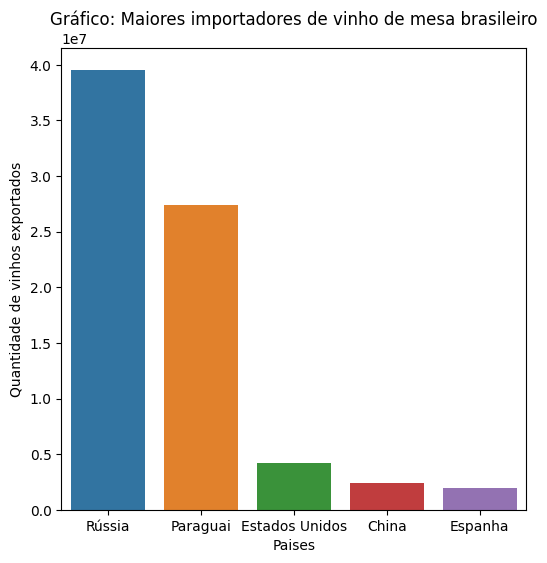

In [1984]:
#  Plotar grafico: Maiores importadores de vinhos brasileiros

import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize = ( 6,6 ))
sns.barplot(data = df_qtd_exp, x="pais_destino", y="quantidade")
ax.set_xlabel("Paises", fontsize = 10)
ax.set_ylabel("Quantidade de vinhos exportados", fontsize = 10)
ax.set_title( "Gráfico: Maiores importadores de vinho de mesa brasileiro" , size = 12 )



###1.2. Com base nas exportações realizadas entre 2006 e 2021, quais são  os 5 maiores importadores de espumantes brasileiros?

In [1985]:
#selecionar somente o produto do tipo "Espumante" dos últimos 15 anos

df_espulmantes= df_exportacao.query("tipo=='Espumante'and ano>= '2006' ")

display(df_espulmantes)


,ano,pais_origem,pais_destino,tipo,quantidade,valor
3492,2006,Brasil,Alemanha,Espumante,153,928
3493,2006,Brasil,Angola,Espumante,3314,6657
3494,2006,Brasil,Antigua e Barbuda,Espumante,0,0
3495,2006,Brasil,Antilhas Holandesas,Espumante,0,0
3496,2006,Brasil,Argentina,Espumante,0,0
...,...,...,...,...,...,...
5039,2021,Brasil,Uruguai,Espumante,0,0
5040,2021,Brasil,Vanuatu,Espumante,0,0
5041,2021,Brasil,Venezuela,Espumante,0,0
5042,2021,Brasil,Vietnã,Espumante,144,374


In [1986]:
# Somar a quantidade de vinhos vendidos para cada pais nos últimos 15 anos

espumante_qtd_exp= df_espulmantes.groupby('pais_destino')['quantidade'].sum()


display(espumante_qtd_exp)

pais_destino
Alemanha                58581
Angola                 142259
Antigua e Barbuda          49
Antilhas Holandesas      9324
Argentina                4657
                        ...  
Uruguai                113063
Vanuatu                    14
Venezuela                2398
Vietnã                   1008
Índia                      43
Name: quantidade, Length: 97, dtype: int64

In [1987]:
#Armazenar série em um dataframe
df_qtd_espumante = espumante_qtd_exp.to_frame()

display(df_qtd_espumante)


,quantidade
pais_destino,
Alemanha,58581
Angola,142259
Antigua e Barbuda,49
Antilhas Holandesas,9324
Argentina,4657
...,...
Uruguai,113063
Vanuatu,14
Venezuela,2398


In [1988]:
# Ordenar pela quantidade vendida

df_qtd_espumante= df_qtd_espumante.sort_values(by='quantidade',ascending=False,)


print(df_qtd_espumante)

                quantidade
pais_destino              
Estados Unidos     2725446
Paraguai            503552
Reino Unido         339601
Chile               180661
Angola              142259
...                    ...
Cuba                     1
Bangladesh               1
Iraque                   0
Bulgaria                 0
Guiné-Bissau             0

[97 rows x 1 columns]


In [1989]:
#Armazenar somente os 5 maiores importadores de espumantes

df_qtd_espumante= df_qtd_espumante.head().reset_index()

display(df_qtd_espumante)


,pais_destino,quantidade
0,Estados Unidos,2725446
1,Paraguai,503552
2,Reino Unido,339601
3,Chile,180661
4,Angola,142259


Text(0.5, 1.0, 'Gráfico: Maiores importadores de espumantes do Brasil')

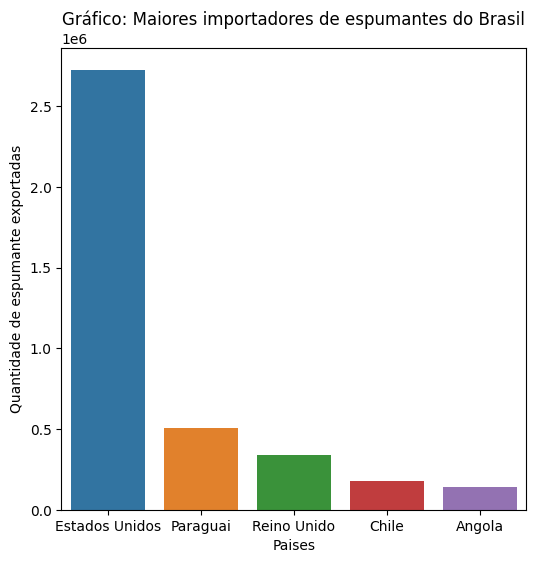

In [1990]:
# Grafico: Maiores importadores de vinhos brasileiros
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize = ( 6,6 ))
sns.barplot(data = df_qtd_espumante, x="pais_destino", y="quantidade")
ax.set_xlabel("Paises", fontsize = 10)
ax.set_ylabel("Quantidade de espumante exportadas", fontsize = 10)
ax.set_title( "Gráfico: Maiores importadores de espumantes do Brasil" , size = 12 )



### 2. Análise: Correlação entre a quantidade vendida e a inflação

####2.1 Tratamento e limpeza dos dados



Para esta análise foram selecionados os dois países que mais importaram produtos brasileiros. Desta formas temos os seguintes paises:


1.   Russia e Paraguai - Vinhos
2.   Estados Unidos e Paraguai - Espumantes



#####2.1.1 Taxa de cambio


In [1991]:
# Realizar upload do arquivo com dados da taxa de cambio
cambio = pd.read_csv('/content/drive/MyDrive/dados/cambio.csv', delimiter=',',
                         )
print(cambio)

     ano  taxa_cambio
0   2006       2.1761
1   2007       1.9479
2   2008       1.8346
3   2009       1.9976
4   2010       1.7603
5   2011       1.6750
6   2012       1.9546
7   2013       2.1576
8   2014       2.3534
9   2015       3.3315
10  2016       3.4901
11  2017       3.1920
12  2018       3.6542
13  2019       3.9451
14  2020       5.1558
15  2021       5.3950


#####2.1.2 Inflação




In [1992]:
# Realizar upload do arquivo com dados da inflação
df_inflacao = pd.read_csv('/content/drive/MyDrive/dados/inflacao.csv', delimiter=',',
                         )
print(df_inflacao)

     ano  taxa_br  taxa_eua  taxa_russia  taxa_paraguai
0   2006     4.18      3.23         9.67           9.59
1   2007     3.64      2.85         9.01           8.13
2   2008     5.68      3.84        14.11          10.15
3   2009     4.89     -0.36        11.65           2.59
4   2010     5.04      1.64         6.85           4.65
5   2011     6.64      3.16         8.44           8.25
6   2012     5.40      2.07         5.07           3.68
7   2013     6.20      1.46         6.75           2.68
8   2014     6.33      1.62         7.82           5.03
9   2015     9.03      0.12        15.53           3.13
10  2016     8.74      1.26         7.04           4.09
11  2017     3.45      2.13         3.68           3.60
12  2018     3.66      2.44         2.88           3.98
13  2019     3.73      1.81         4.47           2.76
14  2020     3.21      1.23         3.38           1.77
15  2021     8.30      4.70         6.69           4.79


In [1993]:
#Criar dataframe com a inflação BR
inflacao_br=df_inflacao[['ano','taxa_br']]
print(inflacao_br)

     ano  taxa_br
0   2006     4.18
1   2007     3.64
2   2008     5.68
3   2009     4.89
4   2010     5.04
5   2011     6.64
6   2012     5.40
7   2013     6.20
8   2014     6.33
9   2015     9.03
10  2016     8.74
11  2017     3.45
12  2018     3.66
13  2019     3.73
14  2020     3.21
15  2021     8.30


In [1994]:
#Criar dataframe com a inflação EUA
inflacao_eua=df_inflacao[['ano','taxa_eua']]
print(inflacao_eua)

     ano  taxa_eua
0   2006      3.23
1   2007      2.85
2   2008      3.84
3   2009     -0.36
4   2010      1.64
5   2011      3.16
6   2012      2.07
7   2013      1.46
8   2014      1.62
9   2015      0.12
10  2016      1.26
11  2017      2.13
12  2018      2.44
13  2019      1.81
14  2020      1.23
15  2021      4.70


In [1995]:
#Criar dataframe com a inflação RÚSSIA
inflacao_russia=df_inflacao[['ano','taxa_russia']]
print(inflacao_russia)

     ano  taxa_russia
0   2006         9.67
1   2007         9.01
2   2008        14.11
3   2009        11.65
4   2010         6.85
5   2011         8.44
6   2012         5.07
7   2013         6.75
8   2014         7.82
9   2015        15.53
10  2016         7.04
11  2017         3.68
12  2018         2.88
13  2019         4.47
14  2020         3.38
15  2021         6.69


In [1996]:
#Criar dataframe com a inflação PARAGUAI
inflacao_paraguai=df_inflacao[['ano','taxa_paraguai']]

print(inflacao_paraguai)

     ano  taxa_paraguai
0   2006           9.59
1   2007           8.13
2   2008          10.15
3   2009           2.59
4   2010           4.65
5   2011           8.25
6   2012           3.68
7   2013           2.68
8   2014           5.03
9   2015           3.13
10  2016           4.09
11  2017           3.60
12  2018           3.98
13  2019           2.76
14  2020           1.77
15  2021           4.79


#####2.2.3 Quantidade exportada por país


In [1997]:
# Criar dataframe  somente com quantidade de "Vinho de Mesa" exportados para Russia

df_vinho_russia= df_exportacao.query("tipo=='Vinho de mesa'and ano>= '2006' and pais_destino=='Rússia' ")
df_vinho_russia["ano"]= df_vinho_russia["ano"].astype(int)
print(df_vinho_russia)



       ano pais_origem pais_destino           tipo  quantidade     valor
4565  2006      Brasil       Rússia  Vinho de mesa      334200    164744
4689  2007      Brasil       Rússia  Vinho de mesa      266400    173160
4813  2008      Brasil       Rússia  Vinho de mesa     6207658   2352768
4937  2009      Brasil       Rússia  Vinho de mesa    21912914   5732280
5061  2010      Brasil       Rússia  Vinho de mesa           0         0
5185  2011      Brasil       Rússia  Vinho de mesa           0         0
5309  2012      Brasil       Rússia  Vinho de mesa     4528176   2103968
5433  2013      Brasil       Rússia  Vinho de mesa     5893291  14795694
5557  2014      Brasil       Rússia  Vinho de mesa      190656     61440
5681  2015      Brasil       Rússia  Vinho de mesa       47664     18240
5805  2016      Brasil       Rússia  Vinho de mesa           0         0
5929  2017      Brasil       Rússia  Vinho de mesa           0         0
6053  2018      Brasil       Rússia  Vinho de mesa 

<ipython-input-1997-95873d8650b9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vinho_russia["ano"]= df_vinho_russia["ano"].astype(int)


In [1998]:
# Criar dataframe  somente com quantidade de "Vinho de Mesa" exportados para Paraguai

df_vinho_paraguai= df_exportacao.query("tipo=='Vinho de mesa'and ano>= '2006' and pais_destino=='Paraguai' ")
df_vinho_paraguai["ano"]= df_vinho_paraguai["ano"].astype(int)

print(df_vinho_paraguai)


       ano pais_origem pais_destino           tipo  quantidade    valor
4557  2006      Brasil     Paraguai  Vinho de mesa     1947106   873636
4681  2007      Brasil     Paraguai  Vinho de mesa     1285459   801519
4805  2008      Brasil     Paraguai  Vinho de mesa     2191901  1374088
4929  2009      Brasil     Paraguai  Vinho de mesa      486927   392087
5053  2010      Brasil     Paraguai  Vinho de mesa      510989   449197
5177  2011      Brasil     Paraguai  Vinho de mesa      240168   276281
5301  2012      Brasil     Paraguai  Vinho de mesa      354824   428279
5425  2013      Brasil     Paraguai  Vinho de mesa      481564   680828
5549  2014      Brasil     Paraguai  Vinho de mesa      521847   908028
5673  2015      Brasil     Paraguai  Vinho de mesa      495428   741370
5797  2016      Brasil     Paraguai  Vinho de mesa      985739  1655417
5921  2017      Brasil     Paraguai  Vinho de mesa     2393468  4274650
6045  2018      Brasil     Paraguai  Vinho de mesa     3234168  

<ipython-input-1998-e7727e88c232>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vinho_paraguai["ano"]= df_vinho_paraguai["ano"].astype(int)


In [1999]:
# Criar dataframe  somente com quantidade de "Espumante" exportados para EUA

df_espumante_eua= df_exportacao.query("tipo=='Espumante'and ano>= '2006' and pais_destino=='Estados Unidos' ")
df_espumante_eua["ano"]= df_espumante_eua["ano"].astype(int)

print(df_espumante_eua)


       ano pais_origem    pais_destino       tipo  quantidade    valor
3527  2006      Brasil  Estados Unidos  Espumante       19131    85474
3624  2007      Brasil  Estados Unidos  Espumante       21400    86898
3721  2008      Brasil  Estados Unidos  Espumante      283760   324094
3818  2009      Brasil  Estados Unidos  Espumante       35695   200975
3915  2010      Brasil  Estados Unidos  Espumante      123001   172488
4012  2011      Brasil  Estados Unidos  Espumante       67547   333438
4109  2012      Brasil  Estados Unidos  Espumante      126129   513426
4206  2013      Brasil  Estados Unidos  Espumante       91987   364136
4303  2014      Brasil  Estados Unidos  Espumante       39748   136533
4400  2015      Brasil  Estados Unidos  Espumante       18450    92868
4497  2016      Brasil  Estados Unidos  Espumante       22615   143306
4594  2017      Brasil  Estados Unidos  Espumante       22605   170620
4691  2018      Brasil  Estados Unidos  Espumante       28542   172961
4788  

<ipython-input-1999-dcb8fb9ddebc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_espumante_eua["ano"]= df_espumante_eua["ano"].astype(int)


In [2000]:
# Criar dataframe  somente com quantidade de "Espumante" exportados para Paraguai

df_espumante_paraguai= df_exportacao.query("tipo=='Espumante'and ano>= '2006' and pais_destino=='Paraguai' ")
df_espumante_paraguai["ano"]= df_espumante_paraguai["ano"].astype(int)

print(df_espumante_paraguai)

       ano pais_origem pais_destino       tipo  quantidade   valor
3565  2006      Brasil     Paraguai  Espumante       12153   17950
3662  2007      Brasil     Paraguai  Espumante        3455    6958
3759  2008      Brasil     Paraguai  Espumante        4637    8088
3856  2009      Brasil     Paraguai  Espumante       20099   18376
3953  2010      Brasil     Paraguai  Espumante        6728   24228
4050  2011      Brasil     Paraguai  Espumante        2513    8531
4147  2012      Brasil     Paraguai  Espumante        3568   10442
4244  2013      Brasil     Paraguai  Espumante       23603   81321
4341  2014      Brasil     Paraguai  Espumante       28038   96500
4438  2015      Brasil     Paraguai  Espumante       29016   70845
4535  2016      Brasil     Paraguai  Espumante       40197  123169
4632  2017      Brasil     Paraguai  Espumante       80951  255320
4729  2018      Brasil     Paraguai  Espumante       92114  205510
4826  2019      Brasil     Paraguai  Espumante       94620  22

<ipython-input-2000-38bdeb26c09f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_espumante_paraguai["ano"]= df_espumante_paraguai["ano"].astype(int)


#####2.3 Junção das tabelas


In [2001]:
#Adicionar a inflação e taxa de cambio ao dataframe Rússia
df_vinho_russia= pd.merge(df_vinho_russia, inflacao_br, on="ano", how="left")
df_vinho_russia= pd.merge(df_vinho_russia, inflacao_russia, on="ano", how="left")
df_vinho_russia= pd.merge(df_vinho_russia, cambio, on="ano", how="left")

print(df_vinho_russia)


     ano pais_origem pais_destino           tipo  quantidade     valor  \
0   2006      Brasil       Rússia  Vinho de mesa      334200    164744   
1   2007      Brasil       Rússia  Vinho de mesa      266400    173160   
2   2008      Brasil       Rússia  Vinho de mesa     6207658   2352768   
3   2009      Brasil       Rússia  Vinho de mesa    21912914   5732280   
4   2010      Brasil       Rússia  Vinho de mesa           0         0   
5   2011      Brasil       Rússia  Vinho de mesa           0         0   
6   2012      Brasil       Rússia  Vinho de mesa     4528176   2103968   
7   2013      Brasil       Rússia  Vinho de mesa     5893291  14795694   
8   2014      Brasil       Rússia  Vinho de mesa      190656     61440   
9   2015      Brasil       Rússia  Vinho de mesa       47664     18240   
10  2016      Brasil       Rússia  Vinho de mesa           0         0   
11  2017      Brasil       Rússia  Vinho de mesa           0         0   
12  2018      Brasil       Rússia  Vin

In [2002]:
#Adicionar a inflação e taxa de cambio ao dataframe Paraguai - Vinho de Mesa

df_vinho_paraguai= pd.merge(df_vinho_paraguai, inflacao_br, on="ano", how="left")
df_vinho_paraguai= pd.merge(df_vinho_paraguai, inflacao_paraguai, on="ano", how="left")
df_vinho_paraguai= pd.merge(df_vinho_paraguai, cambio, on="ano", how="left")

print(df_vinho_paraguai)


     ano pais_origem pais_destino           tipo  quantidade    valor  \
0   2006      Brasil     Paraguai  Vinho de mesa     1947106   873636   
1   2007      Brasil     Paraguai  Vinho de mesa     1285459   801519   
2   2008      Brasil     Paraguai  Vinho de mesa     2191901  1374088   
3   2009      Brasil     Paraguai  Vinho de mesa      486927   392087   
4   2010      Brasil     Paraguai  Vinho de mesa      510989   449197   
5   2011      Brasil     Paraguai  Vinho de mesa      240168   276281   
6   2012      Brasil     Paraguai  Vinho de mesa      354824   428279   
7   2013      Brasil     Paraguai  Vinho de mesa      481564   680828   
8   2014      Brasil     Paraguai  Vinho de mesa      521847   908028   
9   2015      Brasil     Paraguai  Vinho de mesa      495428   741370   
10  2016      Brasil     Paraguai  Vinho de mesa      985739  1655417   
11  2017      Brasil     Paraguai  Vinho de mesa     2393468  4274650   
12  2018      Brasil     Paraguai  Vinho de mesa   

In [2003]:
#Adicionar a inflação e taxa de cambio ao dataframe EUA

df_espumante_eua= pd.merge(df_espumante_eua, inflacao_br, on="ano", how="left")
df_espumante_eua= pd.merge(df_espumante_eua, inflacao_eua, on="ano", how="left")
df_espumante_eua= pd.merge(df_espumante_eua, cambio, on="ano", how="left")

print(df_espumante_eua)



     ano pais_origem    pais_destino       tipo  quantidade    valor  taxa_br  \
0   2006      Brasil  Estados Unidos  Espumante       19131    85474     4.18   
1   2007      Brasil  Estados Unidos  Espumante       21400    86898     3.64   
2   2008      Brasil  Estados Unidos  Espumante      283760   324094     5.68   
3   2009      Brasil  Estados Unidos  Espumante       35695   200975     4.89   
4   2010      Brasil  Estados Unidos  Espumante      123001   172488     5.04   
5   2011      Brasil  Estados Unidos  Espumante       67547   333438     6.64   
6   2012      Brasil  Estados Unidos  Espumante      126129   513426     5.40   
7   2013      Brasil  Estados Unidos  Espumante       91987   364136     6.20   
8   2014      Brasil  Estados Unidos  Espumante       39748   136533     6.33   
9   2015      Brasil  Estados Unidos  Espumante       18450    92868     9.03   
10  2016      Brasil  Estados Unidos  Espumante       22615   143306     8.74   
11  2017      Brasil  Estado

In [2004]:
#Adicionar a inflação e taxa de cambio ao dataframe Paraguai - Espumante

df_espumante_paraguai= pd.merge(df_espumante_paraguai, inflacao_br, on="ano", how="left")
df_espumante_paraguai= pd.merge(df_espumante_paraguai, inflacao_paraguai, on="ano", how="left")
df_espumante_paraguai= pd.merge(df_espumante_paraguai, cambio, on="ano", how="left")


print(df_espumante_paraguai)



     ano pais_origem pais_destino       tipo  quantidade   valor  taxa_br  \
0   2006      Brasil     Paraguai  Espumante       12153   17950     4.18   
1   2007      Brasil     Paraguai  Espumante        3455    6958     3.64   
2   2008      Brasil     Paraguai  Espumante        4637    8088     5.68   
3   2009      Brasil     Paraguai  Espumante       20099   18376     4.89   
4   2010      Brasil     Paraguai  Espumante        6728   24228     5.04   
5   2011      Brasil     Paraguai  Espumante        2513    8531     6.64   
6   2012      Brasil     Paraguai  Espumante        3568   10442     5.40   
7   2013      Brasil     Paraguai  Espumante       23603   81321     6.20   
8   2014      Brasil     Paraguai  Espumante       28038   96500     6.33   
9   2015      Brasil     Paraguai  Espumante       29016   70845     9.03   
10  2016      Brasil     Paraguai  Espumante       40197  123169     8.74   
11  2017      Brasil     Paraguai  Espumante       80951  255320     3.45   

In [2005]:
#importar arquivo com inflação EUA

df_inflation_eua= df_exportacao.query("tipo=='Espumante'and ano>= '2006' and pais_destino=='Estados Unidos' ")


print (df_inflation_eua)


       ano pais_origem    pais_destino       tipo  quantidade    valor
3527  2006      Brasil  Estados Unidos  Espumante       19131    85474
3624  2007      Brasil  Estados Unidos  Espumante       21400    86898
3721  2008      Brasil  Estados Unidos  Espumante      283760   324094
3818  2009      Brasil  Estados Unidos  Espumante       35695   200975
3915  2010      Brasil  Estados Unidos  Espumante      123001   172488
4012  2011      Brasil  Estados Unidos  Espumante       67547   333438
4109  2012      Brasil  Estados Unidos  Espumante      126129   513426
4206  2013      Brasil  Estados Unidos  Espumante       91987   364136
4303  2014      Brasil  Estados Unidos  Espumante       39748   136533
4400  2015      Brasil  Estados Unidos  Espumante       18450    92868
4497  2016      Brasil  Estados Unidos  Espumante       22615   143306
4594  2017      Brasil  Estados Unidos  Espumante       22605   170620
4691  2018      Brasil  Estados Unidos  Espumante       28542   172961
4788  

Os detalhes encontram-se no seguinte link:

\

## Analise: A inflação e taxa de cambio influencia a quantidade de produtos vendidos?

Para identificar a correlação entre essas variveis foi utilizado o coeficiente de Person, conforme tabela
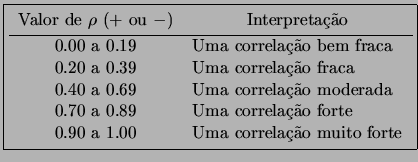

http://leg.ufpr.br/~silvia/CE003/node74.html

##1.1 Correlação entre a quantidade de vinho exportados para Russia e a inflação Russa



In [2006]:
#calculo do coeficiente de Person
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

x= df_vinho_russia['taxa_russia']
y= df_vinho_russia['quantidade']
correlation = y.corr(x)

print (correlation)


0.355486612169017


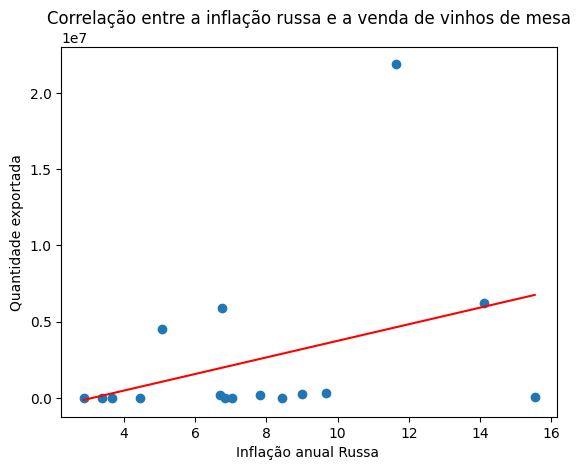

In [2007]:
# plot  grafico de correlação entre a inflação e a venda de Vinhos

plt.scatter(x, y)
plt.title('Correlação entre a inflação russa e a venda de vinhos de mesa')
plt.xlabel('Inflação anual Russa ')
plt.ylabel('Quantidade exportada')


plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='red')


Existe uma correlação entre a taxa de inflação russa e a quantidade de vinhos de mesa exportados para pais.Essa correlação é bem fraca e negativa. Um correlação negativa
significa que quanto maior a inflação, menor será a quantidade de produtos exportados.




##1.2 Correlação entre a quantidade de vinho exportados para Rússia e a inflação brasileira



In [2008]:
#calculo do coeficiente de Person
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

x= df_vinho_russia['taxa_br']
y= df_vinho_russia['quantidade']
correlation = y.corr(x)

print (correlation)



-0.055430176948048616


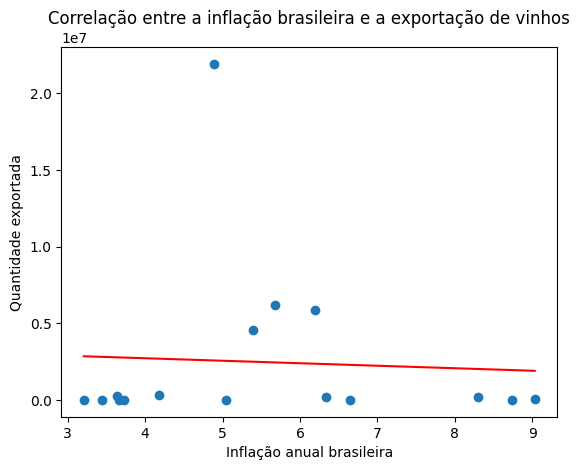

In [2009]:
# plot  grafico de correlação entre a inflação e a venda de espumantes

plt.scatter(x, y)
plt.title('Correlação entre a inflação brasileira e a exportação de vinhos')
plt.xlabel('Inflação anual brasileira')
plt.ylabel('Quantidade exportada')


plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='red')


Existe uma correlação entre a taxa de inflação brasileira e a quantidade de vinhos de mesa exportados para pais.Essa correlação é  bem fraca e negativa. Um correlação negativa
significa que quanto maior a inflação, menor será a quantidade de produtos exportados.

##1.3 Correlação entre a quantidade de vinho exportados para Rússia e a taxa de cambio

In [2010]:
#calculo do coeficiente de Person
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

x= df_vinho_russia['taxa_cambio']
y= df_vinho_russia['quantidade']
correlation = y.corr(x)

print (correlation)


-0.3381493684280782


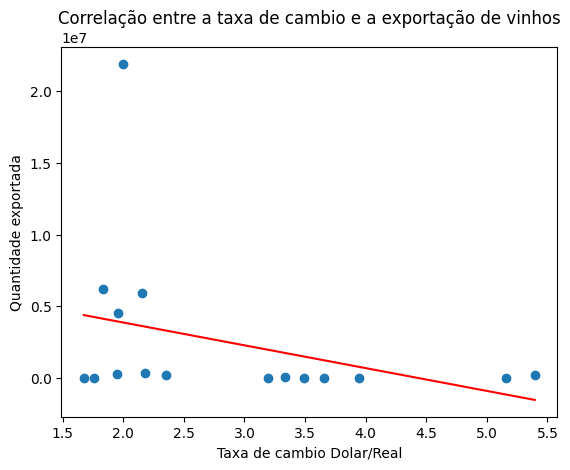

In [2011]:
# plot  grafico de correlação entre a taxade cambio e a venda de vinhos

plt.scatter(x, y)
plt.title('Correlação entre a taxa de cambio e a exportação de vinhos')
plt.xlabel('Taxa de cambio Dolar/Real')
plt.ylabel('Quantidade exportada')


plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='red')


Existe uma correlação entre a taxa de cambio e a quantidade de vinhos de mesa exportados para pais.Essa correlação é   fraca e negativa. Um correlação negativa


##1.4 Correlação entre a quantidade de vinho exportados para Paraguai e a taxa de inflação do Paraguai

In [2012]:
#calculo do coeficiente de Person
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

x= df_vinho_paraguai['taxa_paraguai']
y= df_vinho_paraguai['quantidade']
correlation = y.corr(x)

print (correlation)


-0.028693332249059844


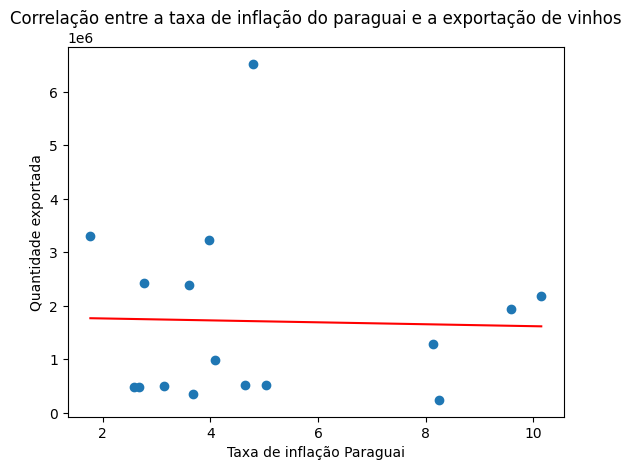

In [2013]:
# plot  grafico de correlação entre a taxa de inflação e a exportaça de vinhos

plt.scatter(x, y)
plt.title('Correlação entre a taxa de inflação do paraguai e a exportação de vinhos')
plt.xlabel('Taxa de inflação Paraguai')
plt.ylabel('Quantidade exportada')


plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='red')


Existe uma correlação entre a taxa de inflação russa e a quantidade de vinhos de mesa exportados para pais.Essa correlação é bem fraca.

##1.5 Correlação entre a quantidade de vinho exportados para *Paraguai* e a taxa de inflação brasileira

In [2014]:
#calculo do coeficiente de Person
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

x= df_vinho_paraguai['taxa_br']
y= df_vinho_paraguai['quantidade']
correlation = y.corr(x)

print (correlation)


-0.07935673678611466


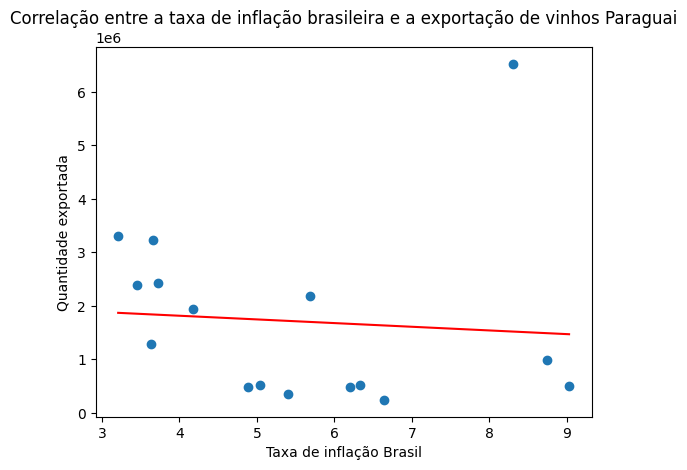

In [2015]:
# plot  grafico de correlação entre a taxa de cambio e a exporação  de vinhos

plt.scatter(x, y)
plt.title('Correlação entre a taxa de inflação brasileira e a exportação de vinhos Paraguai')
plt.xlabel('Taxa de inflação Brasil')
plt.ylabel('Quantidade exportada')


plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='red')


Existe uma correlação entre a taxa de inflação russa e a quantidade de vinhos de mesa exportados para pais.Essa correlação é bem fraca e negativa. Um correlação negativa
significa que quanto maior a inflação, menor será a quantidade de produtos exportados.


##1.6 Correlação entre a quantidade de vinho exportados para *Paraguai* e a taxa de cambio Real/*Dolar*

In [2016]:
#calculo do coeficiente de Person
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

x= df_vinho_paraguai['taxa_cambio']
y= df_vinho_paraguai['quantidade']
correlation = y.corr(x)

print (correlation)


0.7906230765706769


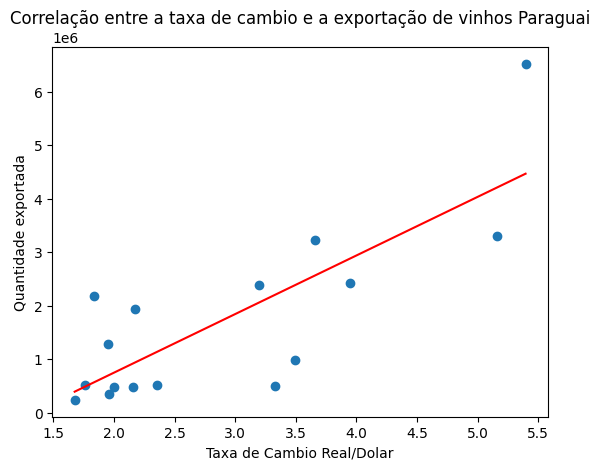

In [2017]:
plt.scatter(x, y)
plt.title('Correlação entre a taxa de cambio e a exportação de vinhos Paraguai')
plt.xlabel('Taxa de Cambio Real/Dolar')
plt.ylabel('Quantidade exportada')


plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='red')


Existe uma forte correlação entre a taxa de cambio e quantidade de vinhos exportados para o Paraguai. Portanto o aumento ou queda da taxa de cambio pode afetar diretamente as exportações  de vinho para este pais.

##1.7 Correlação entre a quantidade de espumantes exportados para EUA e a taxa de inflação americana.




In [2018]:
#calculo do coeficiente de Person
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

x= df_espumante_eua['taxa_eua']
y= df_espumante_eua['quantidade']
correlation = y.corr(x)

print (correlation)


0.3898595967043924


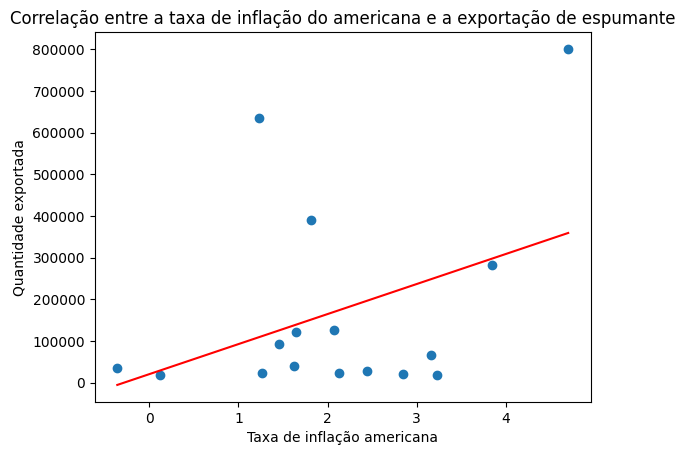

In [2019]:
plt.scatter(x, y)
plt.title('Correlação entre a taxa de inflação do americana e a exportação de espumante')
plt.xlabel('Taxa de inflação americana')
plt.ylabel('Quantidade exportada')


plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='red')


Existe uma correlação entre a taxa de inflação e a quantidade de espumantes exportados para pais.Essa correlação é  fraca.

##1.8 Correlação entre a quantidade de espumantes exportados para EUA e a taxa de inflação brasileira.


In [2020]:
#calculo do coeficiente de Person
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

x= df_espumante_eua['taxa_br']
y= df_espumante_eua['quantidade']
correlation = y.corr(x)

print (correlation)


0.027537751434892125


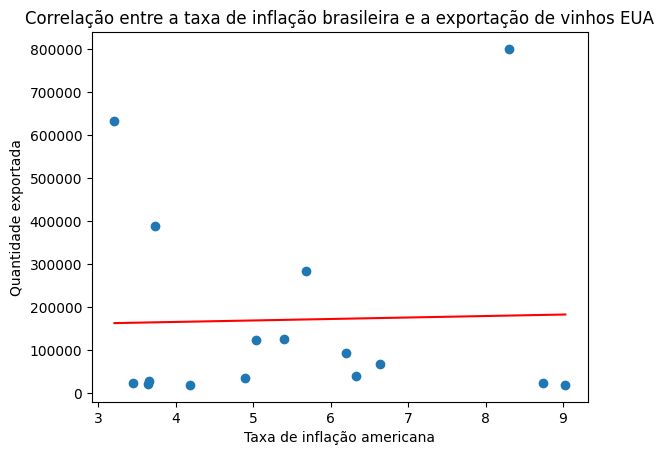

In [2021]:
plt.scatter(x, y)
plt.title('Correlação entre a taxa de inflação brasileira e a exportação de vinhos EUA')
plt.xlabel('Taxa de inflação americana')
plt.ylabel('Quantidade exportada')


plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='red')


##1.9 Correlação entre a quantidade de espumantes exportados para EUA e a taxa de cambio

In [2022]:
#calculo do coeficiente de Person
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

x= df_espumante_eua['taxa_cambio']
y= df_espumante_eua['quantidade']
correlation = y.corr(x)

print (correlation)


0.7315088723208062


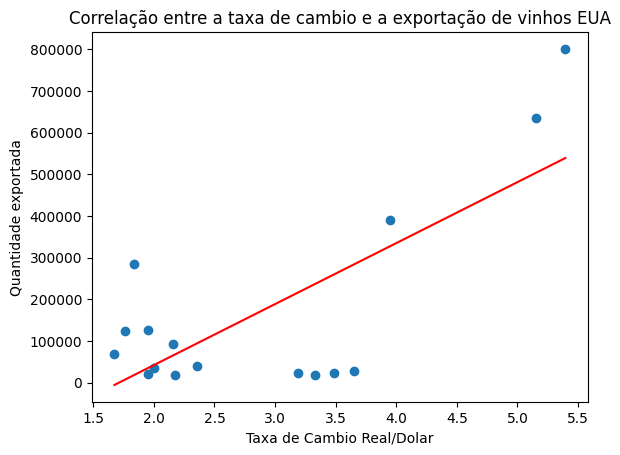

In [2023]:
plt.scatter(x, y)
plt.title('Correlação entre a taxa de cambio e a exportação de vinhos EUA')
plt.xlabel('Taxa de Cambio Real/Dolar')
plt.ylabel('Quantidade exportada')


plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='red')


Existe uma forte correlação entre a taxa de cambio e quantidade de vinhos exportados para o EUA. Portanto o aumento ou queda da taxa de cambio pode afetar diretamente as exportações  de vinho para este pais.

##1.9 Correlação entre a quantidade de espumantes exportados para Paraguai e a taxa de inflação do Paraguai.


In [2024]:
#calculo do coeficiente de Person
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

x= df_espumante_paraguai['taxa_paraguai']
y= df_espumante_paraguai['quantidade']
correlation = y.corr(x)

print (correlation)


-0.43961784764906486


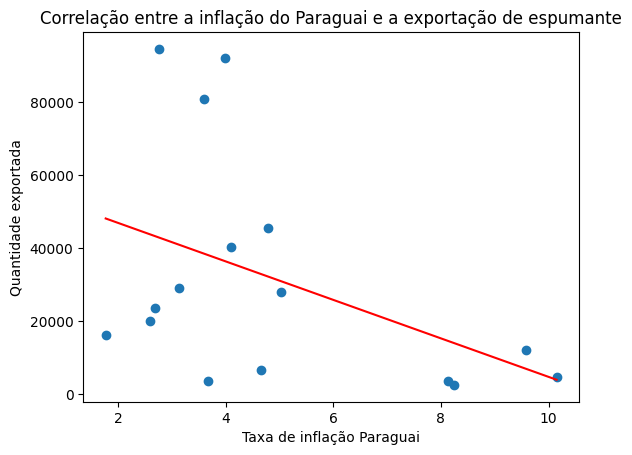

In [2025]:
plt.scatter(x, y)
plt.title('Correlação entre a inflação do Paraguai e a exportação de espumante')
plt.xlabel('Taxa de inflação Paraguai')
plt.ylabel('Quantidade exportada')


plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='red')


##1.10 Correlação entre a quantidade de espumantes exportados para Paraguai e a taxa de inflação *brasileira*.


In [2026]:
#calculo do coeficiente de Person
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

x= df_espumante_paraguai['taxa_br']
y= df_espumante_paraguai['quantidade']
correlation = y.corr(x)

print (correlation)


-0.19638368338860696


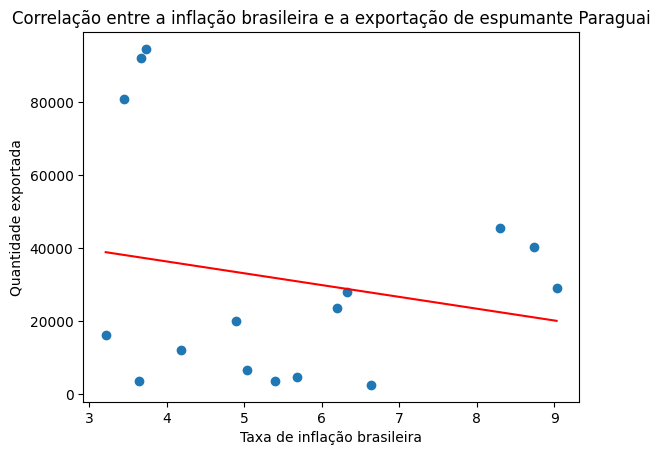

In [2027]:
plt.scatter(x, y)
plt.title('Correlação entre a inflação brasileira e a exportação de espumante Paraguai')
plt.xlabel('Taxa de inflação brasileira')
plt.ylabel('Quantidade exportada')


plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='red')


##1.13 Correlação entre a quantidade de espumantes exportados para Paraguai e a taxa de cambio


In [2028]:
#calculo do coeficiente de Person
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

x= df_espumante_paraguai['taxa_cambio']
y= df_espumante_paraguai['quantidade']
correlation = y.corr(x)

print (correlation)


0.544233297799919


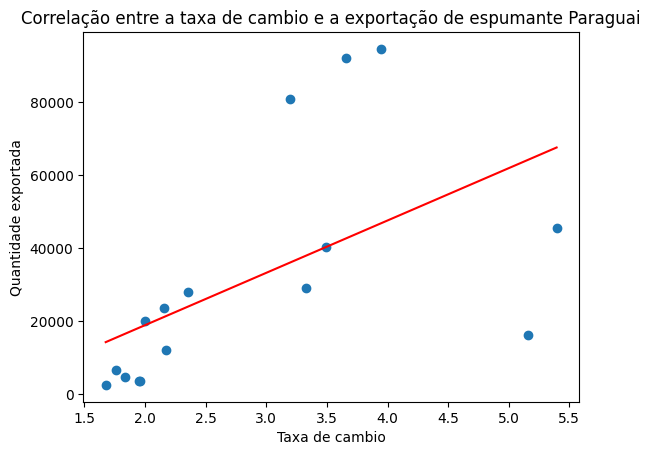

In [2029]:
plt.scatter(x, y)
plt.title('Correlação entre a taxa de cambio e a exportação de espumante Paraguai')
plt.xlabel('Taxa de cambio')
plt.ylabel('Quantidade exportada')


plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='red')


Existe uma  correlação moderada entre a taxa de cambio e quantidade de vinhos exportados para o EUA. Portanto o aumento ou queda da taxa de cambio pode afetar diretamente as exportações  de vinho para este pais.